# Analyze Norwegian GDP Data
* 26-08-2018
* Joakim Blix Prestmo
* ECN222
* Norwegian University of Life Science

In [2]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [5]:
df = pd.read_excel("http://www.ssb.no/statbank/sq/10010628/", skiprows=3, nrows=162)
# df = pd.read_excel("../FastePriserSesJust.xlsx")
# df = pd.read_excel("../FastePriserSesJust.xlsx")
#", skiprows=3, nrows=162


In [6]:
df.tail()


,Unnamed: 0,Konsum i husholdninger og ideelle organisasjoner,Konsum i offentlig forvaltning,Bruttoinvestering i fast realkapital,Lagerendring og statistiske avvik,Eksport i alt,Import i alt,"Bruttonasjonalprodukt, markedsverdi","Bruttonasjonalprodukt Fastlands-Norge, markedsverdi"
205,Database:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,Ekstern PRODUKSJON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,Intern referansekode:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,FastePriserSesJust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['Unnamed: 0'] = df['Unnamed: 0'].str.replace('K','Q')

In [21]:
# df.index = pd.to_datetime(df['Unnamed: 0'])



In [8]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

In [1]:
#df.columns['Consumption', 'PublicConsumption', 'Investments', 'Error', 'Exports', 'Imports', 'GDP', 'GDPMainland']

In [9]:
df.index = pd.Index(pd.period_range('1978-01', periods=210, freq='Q'))


In [10]:
df.head()

,Konsum i husholdninger og ideelle organisasjoner,Konsum i offentlig forvaltning,Bruttoinvestering i fast realkapital,Lagerendring og statistiske avvik,Eksport i alt,Import i alt,"Bruttonasjonalprodukt, markedsverdi","Bruttonasjonalprodukt Fastlands-Norge, markedsverdi"
1978Q1,122919.0,68961.0,85491.0,23188.0,73295.0,69888.0,293066.0,263367.0
1978Q2,123703.0,67663.0,83135.0,3245.0,97233.0,71259.0,297817.0,266308.0
1978Q3,125303.0,69510.0,82682.0,20378.0,80527.0,66907.0,301391.0,267246.0
1978Q4,124430.0,70443.0,87285.0,15558.0,84079.0,69818.0,301788.0,272114.0
1979Q1,126817.0,70977.0,82501.0,16138.0,82192.0,67213.0,300470.0,273996.0


# Figure

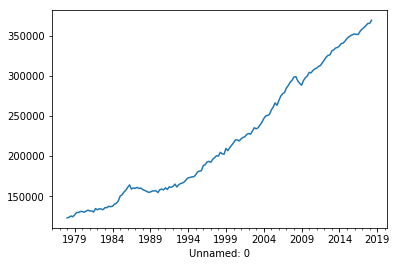

In [25]:
# Simple time series plot
df['Konsum i husholdninger og ideelle organisasjoner'].plot()
plt.show()

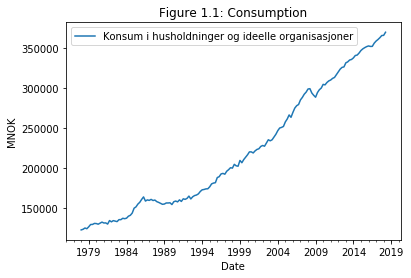

In [26]:
# Add title and legend
df['Konsum i husholdninger og ideelle organisasjoner'].plot()
plt.title("Figure 1.1: Consumption")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')
plt.show()



# Variables engineering

In [45]:
# Create growth rates:
# df[log_C] = ...
df['DC'] = np.log(df['Konsum i husholdninger og ideelle organisasjoner']).diff(4)
Ddf = df.diff(periods=4)
df['DC_Y'] = df['DC']/(df['Bruttonasjonalprodukt Fastlands-Norge, markedsverdi'])

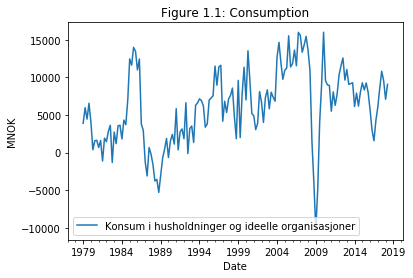

In [41]:
# Add title and legend
Ddf['Konsum i husholdninger og ideelle organisasjoner'].plot()
plt.title("Figure 1.1: Consumption")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')
plt.show()



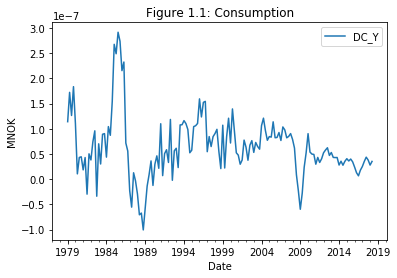

In [46]:
df['DC_Y'].plot()
plt.title("Figure 1.1: Consumption")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')
plt.show()



In [32]:
df.head()

,Konsum i husholdninger og ideelle organisasjoner,Konsum i offentlig forvaltning,Bruttoinvestering i fast realkapital,Lagerendring og statistiske avvik,Eksport i alt,Import i alt,"Bruttonasjonalprodukt, markedsverdi","Bruttonasjonalprodukt Fastlands-Norge, markedsverdi"
Unnamed: 0,,,,,,,,
1978-01-01,122919,68961,85491,23188,73295,69888,293066,263367
1978-04-01,123703,67663,83135,3245,97233,71259,297817,266308
1978-07-01,125303,69510,82682,20378,80527,66907,301391,267246
1978-10-01,124430,70443,87285,15558,84079,69818,301788,272114
1979-01-01,126817,70977,82501,16138,82192,67213,300470,273996


In [49]:
df['C_Y'] = df['Konsum i husholdninger og ideelle organisasjoner']/df['Bruttonasjonalprodukt, markedsverdi']
df['G_Y'] = df['Konsum i offentlig forvaltning']/df['Bruttonasjonalprodukt, markedsverdi']
df['I_Y'] = df['Bruttoinvestering i fast realkapital']/df['Bruttonasjonalprodukt, markedsverdi']
df['NX'] = df['Eksport i alt']-df['Import i alt']
df['NX_Y'] = df['NX']/df['Bruttonasjonalprodukt, markedsverdi']

In [50]:
df.mean()

Konsum i husholdninger og ideelle organisasjoner       2.213354e+05
Konsum i offentlig forvaltning                         1.284753e+05
Bruttoinvestering i fast realkapital                   1.274143e+05
Lagerendring og statistiske avvik                      2.525643e+04
Eksport i alt                                          1.982248e+05
Import i alt                                           1.473078e+05
Bruttonasjonalprodukt, markedsverdi                    5.518910e+05
Bruttonasjonalprodukt Fastlands-Norge, markedsverdi    4.509564e+05
C_Y                                                    3.966636e+01
G_Y                                                    2.323641e-01
I_Y                                                    2.317593e-01
NX                                                     5.091702e+04
NX_Y                                                   9.530165e-02
DC                                                     2.737702e-02
DC_Y                                            